<a href="https://colab.research.google.com/github/ParisaMollahoseini/pose_estimation/blob/main/pose_example_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install pyyaml==5.1
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html


In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
# obtain detectron2's default config
cfg = get_cfg()
# load the pre trained model from Detectron2 model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
# set confidence threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
# load model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
# create the predictor for pose estimation using the config
pose_detector = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:21, 11.2MB/s]                           


Saving friends_01.jpg to friends_01 (1).jpg


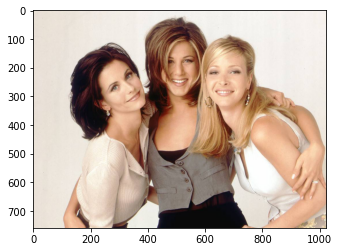

In [31]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['friends_01.jpg']))

import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [32]:
import numpy

open_cv_image = numpy.array(im) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 


In [33]:
outputs = pose_detector(open_cv_image) 

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


In [34]:
keypoints = outputs['instances'][0].get_fields()['pred_keypoints']

In [35]:
type(keypoints)

torch.Tensor

In [36]:
import numpy as np
keypoints_list = keypoints.tolist()
keypoints_list = np.squeeze(keypoints_list)

In [37]:
features = []
# add pose estimate results to the feature array
for row in (keypoints_list):
    # print(row)
    features.append(row[0])
    features.append(row[1])
features

[662.1836547851562,
 245.38714599609375,
 700.1199340820312,
 216.95828247070312,
 630.8863525390625,
 218.85353088378906,
 753.2305297851562,
 244.4394989013672,
 598.6405639648438,
 244.4394989013672,
 801.5991821289062,
 412.1697998046875,
 567.34326171875,
 412.1697998046875,
 996.970458984375,
 634.8626098632812,
 1022.577392578125,
 604.5385131835938,
 989.3832397460938,
 474.71331787109375,
 989.3832397460938,
 472.8180236816406,
 1004.5576782226562,
 725.8348999023438,
 867.9874877929688,
 704.0394287109375,
 816.7736206054688,
 415.0126953125,
 844.27734375,
 693.615478515625,
 860.4002685546875,
 667.0819702148438,
 854.7097778320312,
 667.0819702148438]

In [38]:
len(features)

34